### Sentiment Index

2003년 이후 데이터 사용

#### Business Cycle

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

bsi = pd.read_excel('../../Data/Softdata/BSI.xlsx', index_col = 0)
bsi.index = pd.date_range(start = '2003-01-01', end='2023-11-01', freq='M').strftime('%Y-%m')
bsi.index = pd.to_datetime(bsi.index)

In [2]:
bsi

,industry_BSI,large_corp_ind,mid_corp_ind,chemical_ind,light_ind,export_ind,domestic_ind
2003-01-01,82,94,79,85,79,82,84
2003-02-01,73,84,74,79,72,80,76
2003-03-01,71,81,73,78,68,78,74
2003-04-01,76,84,79,84,67,88,78
2003-05-01,74,84,74,79,70,77,77
...,...,...,...,...,...,...,...
2023-06-01,76,75,71,76,64,67,78
2023-07-01,74,72,72,74,62,68,74
2023-08-01,71,70,64,68,63,64,69
2023-09-01,73,71,63,69,63,63,71


#### Consumer Index

In [3]:
csi = pd.read_excel('../../Data/Softdata/CSI.xlsx', index_col = 0)
csi.index = pd.date_range(start = '2008-07-01', end='2023-11-01', freq='M').strftime('%Y-%m')
csi.index = pd.to_datetime(csi.index.astype(str))

In [4]:
csi

,crnt_living_cdsn_CSI,crnt_economic_jmt_CSI,job_oppr_prop_CSI,interest_prop_CSI,hus_hld_prop_CSI,hus_hld_exp_CSI,inflation_prop,econ_sent_idx_CSI
2008-07-01,70,28,57,136,90,101,163,75
2008-08-01,79,42,73,128,99,109,142,92
2008-09-01,75,43,76,122,98,107,140,91
2008-10-01,71,29,56,114,92,100,147,79
2008-11-01,72,29,47,94,86,95,143,74
...,...,...,...,...,...,...,...,...
2023-06-01,89,69,81,105,98,113,146,101
2023-07-01,91,75,85,112,99,113,144,103
2023-08-01,91,72,84,118,100,113,147,103
2023-09-01,89,66,77,118,99,112,147,100


#### Economic Sentiment

In [5]:
esi = pd.read_excel('../../Data/Softdata/econ_senti_index.xlsx', index_col = 0)
esi.index = pd.date_range(start = '2003-01-01', end='2023-11-01', freq='M').strftime('%Y-%m')
esi.index = pd.to_datetime(esi.index)

In [6]:
esi

,econ_sent_idx,econ_sent_idx_seasonal
2003-01-01,101.0,95.6
2003-02-01,102.3,95.5
2003-03-01,92.3,95.6
2003-04-01,98.0,95.9
2003-05-01,96.1,96.5
...,...,...
2023-06-01,95.7,92.6
2023-07-01,94.1,92.8
2023-08-01,94.0,93.0
2023-09-01,92.7,93.1


In [7]:
csiq = pd.read_excel('../../Data/Softdata/CSI_Q.xlsx', index_col = 0)
csiq.index = pd.date_range(start = '1995-09-01', end='2008-09-01', freq='Q').strftime('%Y-%m')
csiq.index = pd.to_datetime(csiq.index)

#### CSI 분기별 데이터 결측월 예측

In [8]:
from statsmodels.tsa.interp.denton import dentonm

col_name = csiq.columns

csiq_df = pd.DataFrame()

for i in col_name :
    csiq_df = pd.concat(
        [
            csiq_df,
            pd.Series(
            dentonm(esi['econ_sent_idx'].loc[:'2008-06'], csiq[i].loc['2003':], freq = "qm")*3,
            index = esi['econ_sent_idx'].loc[:'2008-06'].index,
            name = i
        )
        ],
        axis = 1
    )

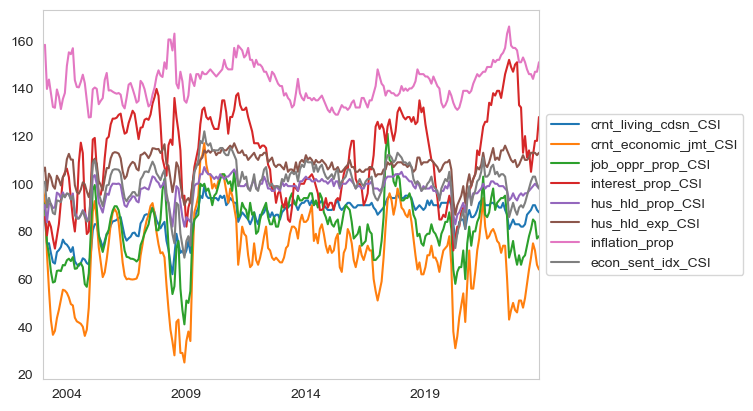

In [9]:
csi = pd.concat([csiq_df, csi])
csi.plot()
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.grid(False)

#### Sentiment index matrix

In [10]:
sentiment = pd.concat(
    [
        csi,
        bsi,
        esi['econ_sent_idx']
    ],
    axis = 1
)

In [27]:
# sentiment.to_csv('../../Cleaned_Data/sentiment_index.csv')

#### Visualization

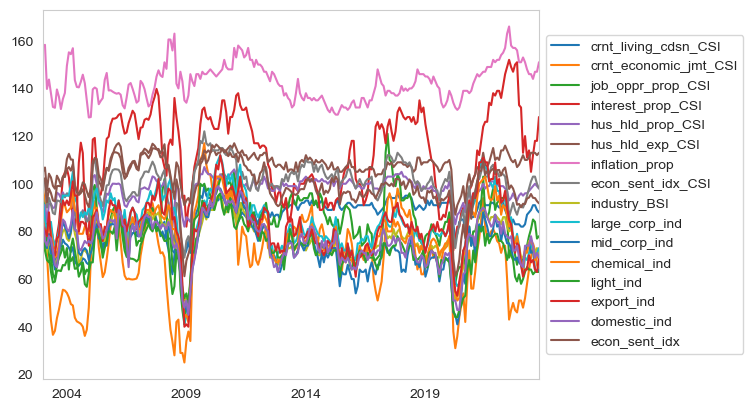

In [12]:
sentiment.plot()
plt.grid(False)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.show()

/var/folders/1q/pl9tj55n57s9jg28npxw61n80000gn/T/ipykernel_36933/1955124147.py:3: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


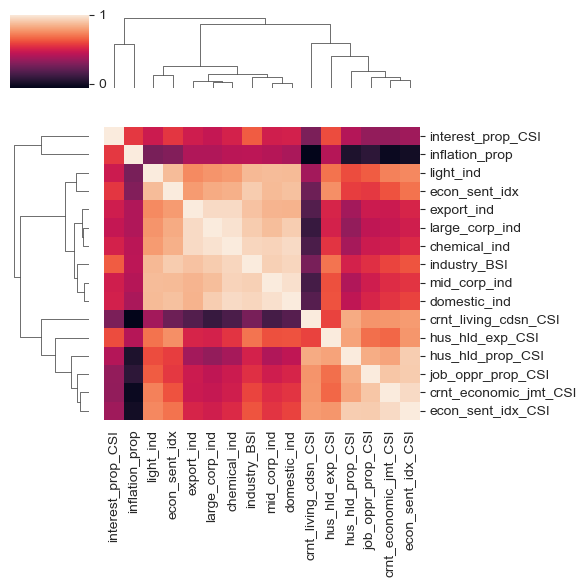

In [13]:
import seaborn as sns
sns.clustermap(sentiment.corr(), figsize = (6,6))
plt.tight_layout()
plt.show()

#### Modeling

In [14]:
sentiment = sentiment * 0.01

In [15]:
sentiment

,crnt_living_cdsn_CSI,crnt_economic_jmt_CSI,job_oppr_prop_CSI,interest_prop_CSI,hus_hld_prop_CSI,hus_hld_exp_CSI,inflation_prop,econ_sent_idx_CSI,industry_BSI,large_corp_ind,mid_corp_ind,chemical_ind,light_ind,export_ind,domestic_ind,econ_sent_idx
2003-01-01,0.859058,0.979713,0.924742,0.846106,0.890581,1.050707,1.579245,1.001139,0.82,0.94,0.79,0.85,0.79,0.82,0.84,1.010
2003-02-01,0.855530,0.923110,0.902632,0.860674,0.911055,1.068228,1.582890,1.008628,0.73,0.84,0.74,0.79,0.72,0.80,0.76,1.023
2003-03-01,0.745413,0.707176,0.752626,0.783220,0.838364,0.971065,1.397865,0.900232,0.71,0.81,0.73,0.78,0.68,0.78,0.74,0.923
2003-04-01,0.750554,0.556794,0.703741,0.841899,0.915404,1.042238,1.437421,0.940696,0.76,0.84,0.79,0.84,0.67,0.88,0.78,0.980
2003-05-01,0.708490,0.427125,0.630779,0.818671,0.916128,1.026432,1.380056,0.912177,0.74,0.84,0.74,0.79,0.70,0.77,0.77,0.961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-01,0.890000,0.690000,0.810000,1.050000,0.980000,1.130000,1.460000,1.010000,0.76,0.75,0.71,0.76,0.64,0.67,0.78,0.957
2023-07-01,0.910000,0.750000,0.850000,1.120000,0.990000,1.130000,1.440000,1.030000,0.74,0.72,0.72,0.74,0.62,0.68,0.74,0.941
2023-08-01,0.910000,0.720000,0.840000,1.180000,1.000000,1.130000,1.470000,1.030000,0.71,0.70,0.64,0.68,0.63,0.64,0.69,0.940
2023-09-01,0.890000,0.660000,0.770000,1.180000,0.990000,1.120000,1.470000,1.000000,0.73,0.71,0.63,0.69,0.63,0.63,0.71,0.927


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

X1 = sentiment.iloc[:,:7]
y1 = sentiment['econ_sent_idx_CSI']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.05, shuffle = False)

model1 = RandomForestRegressor(n_estimators = 1000, 
                              random_state = 42,
                              criterion = 'squared_error',
                              max_depth = 10)
model1.fit(X_train1, y_train1)
y_pred1 = model1.predict(X_test1)
mse = mean_squared_error(y_test1, y_pred1)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.00035452737325323793


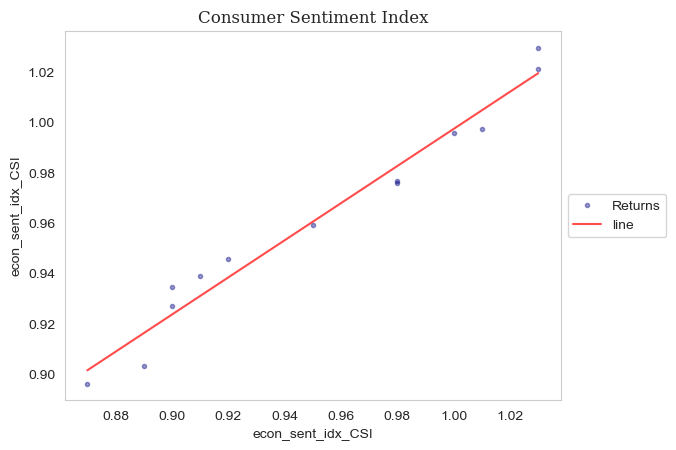

In [28]:
beta, alpha = np.polyfit(x = y_test1 , y = y_pred1 ,deg = 1)
#plt.axvline(0, color = 'grey', alpha = 0.5)
#plt.axhline(0, color = 'grey', alpha = 0.5)
plt.scatter(y = y_pred1, x = y_test1, label = 'Returns', marker = '.', color = 'navy', alpha = 0.4)
sns.lineplot(x = y_test1, y = alpha + y_test1 * beta, color = 'red', label = 'line', alpha = 0.7)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.title('Consumer Sentiment Index', fontfamily = 'Serif')
plt.grid(False)
plt.show()

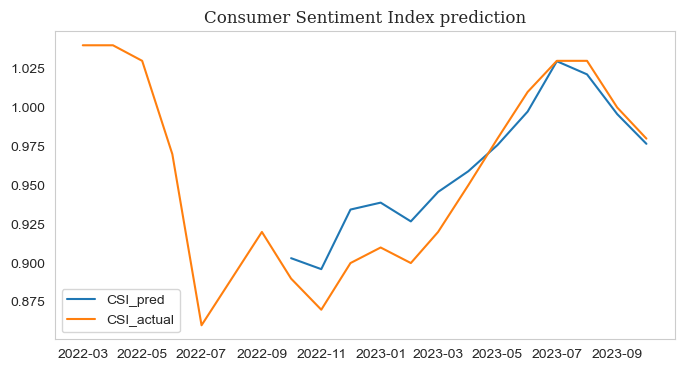

In [18]:
plt.figure(figsize = (8,4))
plt.plot(pd.Series(y_pred1, index = X_test1.index), label = 'CSI_pred')
plt.plot(sentiment['econ_sent_idx_CSI'][-20:].dropna(), label = 'CSI_actual')
plt.title('Consumer Sentiment Index prediction', fontsize = 12, fontfamily = 'Serif')
plt.legend()
plt.grid(False)

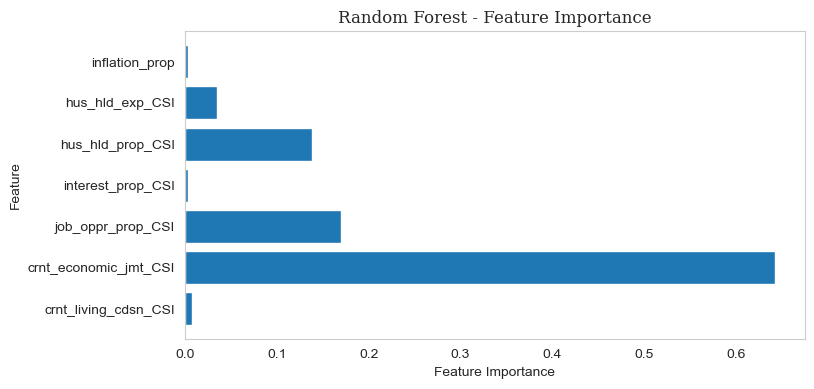

In [19]:
importance = model1.feature_importances_
feature_names = X_train1.columns

plt.figure(figsize = (8, 4))
plt.barh(range(len(importance)), importance, align="center")
plt.yticks(np.arange(len(importance)), feature_names)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.grid(False)
plt.title("Random Forest - Feature Importance", fontsize = 12, fontfamily = 'Serif')
plt.show()

In [33]:
X2 = sentiment.iloc[:,-7:-1]
y2 = sentiment['industry_BSI']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.05, shuffle = False)

model2 = RandomForestRegressor(n_estimators = 1000, 
                              random_state = 42,
                              criterion = 'squared_error',
                              max_depth = 10)
model2.fit(X_train2, y_train2)
y_pred2 = model2.predict(X_test2)
mse = mean_squared_error(y_test2, y_pred2)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.0023281941485370408


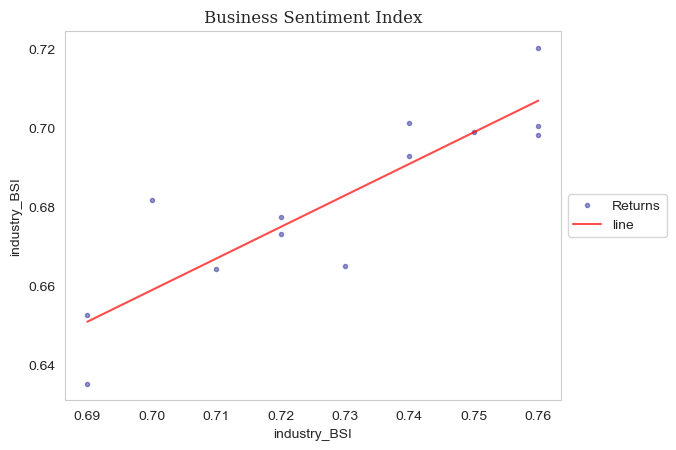

In [34]:
beta, alpha = np.polyfit(x = y_test2 , y = y_pred2 ,deg = 1)
plt.scatter(y = y_pred2, x = y_test2, label = 'Returns', marker = '.', color = 'navy', alpha = 0.4)
sns.lineplot(x = y_test2, y = alpha + y_test2 * beta, color = 'red', label = 'line', alpha = 0.7)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.title('Business Sentiment Index', fontfamily = 'Serif')
plt.grid(False)
plt.show()

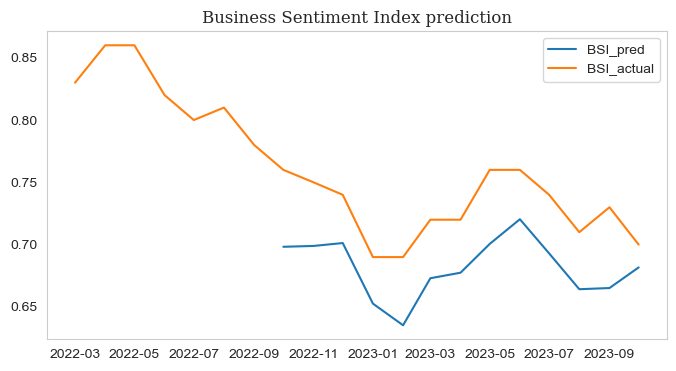

In [35]:
plt.figure(figsize = (8,4))
plt.plot(pd.Series(y_pred2, index = X_test2.index), label = 'BSI_pred')
plt.plot(sentiment['industry_BSI'][-20:].dropna(), label = 'BSI_actual')
plt.title('Business Sentiment Index prediction', fontsize = 12, fontfamily = 'Serif')
plt.legend()
plt.grid(False)

#### Economic sentiment

In [36]:
second_X = pd.concat(
    [
        pd.Series(model1.predict(X_train1), index = X_train1.index, name = 'CSI'), 
        pd.Series(model2.predict(X_train2), index = X_train2.index, name = 'BSI')
    ], 
    axis = 1
)

second_X_test = pd.concat(
    [
        pd.Series(model1.predict(X_test1), index = X_test1.index, name = 'CSI'), 
        pd.Series(model2.predict(X_test2), index = X_test2.index, name = 'BSI')
    ], 
    axis = 1
)

In [37]:
y3 = sentiment['econ_sent_idx']

y_train3, y_test3 = train_test_split(y3, test_size = 0.05, shuffle = False)

model3 = RandomForestRegressor(n_estimators = 1000, 
                              random_state = 42,
                              criterion = 'squared_error',
                              max_depth = 10)
model3.fit(second_X, y_train3)
y_pred3 = model3.predict(second_X_test)
mse = mean_squared_error(y_test3, y_pred3)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.0006516525558138003


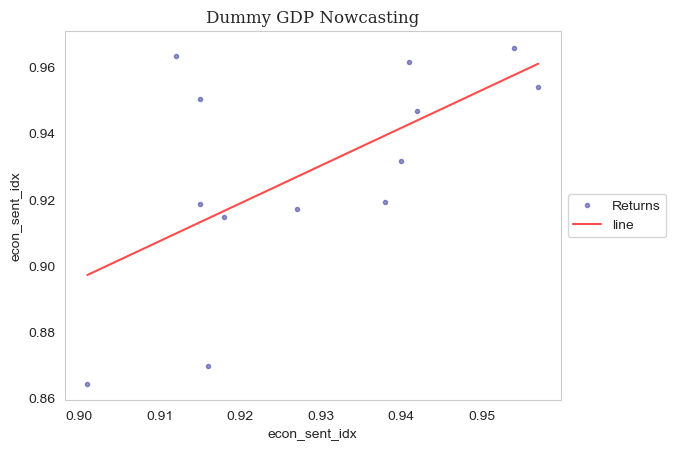

In [38]:
beta, alpha = np.polyfit(x = y_test3 , y = y_pred3 ,deg = 1)
plt.scatter(y = y_pred3, x = y_test3, label = 'Returns', marker = '.', color = 'navy', alpha = 0.4)
sns.lineplot(x = y_test3, y = alpha + y_test3 * beta, color = 'red', label = 'line', alpha = 0.7)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.title('Dummy GDP Nowcasting', fontfamily = 'Serif')
plt.grid(False)
plt.show()

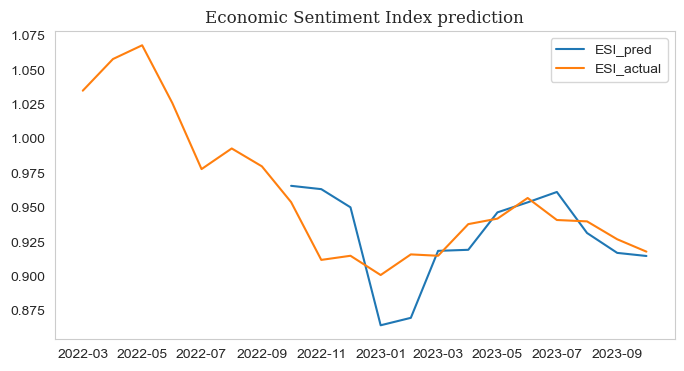

In [39]:
plt.figure(figsize = (8,4))
plt.plot(pd.Series(y_pred3, index = X_test2.index), label = 'ESI_pred')
plt.plot(sentiment['econ_sent_idx'][-20:].dropna(), label = 'ESI_actual')
plt.title('Economic Sentiment Index prediction', fontsize = 12, fontfamily = 'Serif')
plt.legend()
plt.grid(False)